# 주제 : S&P 500 기업에 대한 Total ESG risk ratings와 주가 간의 상관관계 분석
##    용어 정리
###      S&P 500 기업 / Total ESG risk ratings
+ S&P 500 기업
    - 미국의 스탠더드 앤드 푸어(Standard & Poor)사가 작성해 발표하는 주가지수.
    
+ Total ESG risk ratings
    - ESG 기업 경영, 기후협약, 투자자적 관점
    - 대표적으로 두 개의 ESG 평가기관이 제시하는 지표가 많이 쓰임 -> MSCI, Sustainanalytics (Morningstar)
    - 아직 국제적으로 하나의 통일된 기준 혹은 지표가 없음<br><br>
    - E = Environment(환경) -  기후변화, 파리협정, 플라스틱 등의 이슈<br>
      S = Social(사회) -  인권, 아동 착취, 성평등, 노동자 보호, 교육, 소비자 보호, 안전 등의 이슈<br>
      G = Governance(기업지배구조) -  공시가 중요해짐에 따라 기업의 투명성.<br>예를 들어, ESG 부서가 기업 구조적으로 기업의 결정에 실질적인 영향력을 행사할 수 있는 구조인지, 마케팅 부서에 속하며 그린워싱, ESG 워싱에 이용하는 기업인지 여부 판단.

    
    
## 주제 내용
- ESG 관련 지표가 주가와의 유의미한 상관관계가 있는가
- 상관관계가 있다면, 높은 상관관계를 가지는 기업들은 어떤 공통점이 있는가
  
## 선정 동기
- 팀원 4명 중 3명이 '주가'라는 지표에 대해 관심을 가지고 있었고, 나머지 한 명도 2순위로는 금융을 생각하고 있어 '주가' 관련 주제를 잡았다.<br>또한,   팀원 1명은 ESG 관련 전공자였고 'ESG'라는 주제 자체가 최근 주요 시사로 떠오름에 따라 위와 같은 주제로 출발하게 되었음.

 # 데이터 수집
 ## yahoo finance의 yfinance 패키지 및 위키피디아로부터 다음과 같은 데이터를 수집함
-   yfinance : 'Total ESG risk ratings', 개별종목들의 기간별 주가, 개별종목들의 시가총액
-   위키피디아 : 'S&P 500'에 해당하는 기업 목록(기업 코드, 기업이 속한 산업 분야)

In [45]:
total_marketCap.head()   # 최종 데이터

,Symbol,Corr,P-value,Sector,Marketcap,Rooted,Logged
30,COF,-0.912101,3.581582e-11,Financials,0.015538,0.08493,0.307128
120,PSA,-0.912057,3.603223e-11,Real Estate,0.020882,0.104286,0.350782
94,MSFT,-0.902116,1.300535e-10,Information Technology,0.81053,0.894671,0.963558
66,GS,-0.887677,6.700324e-10,Financials,0.036059,0.149737,0.435836
79,JNJ,-0.870915,3.469516e-09,Health Care,0.160865,0.368689,0.684769


- 데이터 타입<br><br>
    Symbol : str&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  기업 코드<br><br>
    Corr : numpy.float64&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  ESG risk ratings와 주가(월말 조정된 종가) 간의 상관계수<br><br>
    P-value : numpy.float64&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  상관계수를 구할 때 얻어지는 통계검정량<br><br>
    Sector : str&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  기업이 속한 산업 분야<br><br>
    Marketcap : float&nbsp;&nbsp&nbsp;&nbsp;&nbsp;&nbsp;#  개별 기업의 현재 시점 시가총액을 0~1 사이 scaling한 값<br><br>
    Rooted : float&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  시가총액의 편차가 너무 커서 루트를 씌워준 후 위와 같이 scaling한 값<br><br>
    Logged : float&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  루트와 같이 log를 씌워준 후 위와 같이 scaling한 값

In [12]:
#type(total_marketCap['Logged'][0])

# 데이터 탐색 순서
## 'esg 관련 지표'와 '주가' 간 상관관계 분석

In [13]:
import yfinance
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from datetime import datetime as dt
import urllib.request
import json
import requests
import seaborn as sns
import os
from pandas import json_normalize
import scipy.stats as stats
pd.set_option('display.max_rows', None)
import time
import random
import numpy as np

### S&P 500 기업 목록 불러오기

In [14]:
# S&P 리스트 불러오기
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
df = first_table
symbols_list = df['Symbol'].values.tolist()

symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'AIG',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMC

### ESG 지표 탐색

In [135]:
# esgScore 가져오기
url = f'https://query2.finance.yahoo.com/v1/finance/esgChart?symbol=fb'
connection = urllib.request.urlopen(url)
data = connection.read()
data_2 = json.loads(data)

#   esgScore 데이터 전처리
df1 = data_2['esgChart']['result'][0]['symbolSeries']
df2 = pd.DataFrame(df1)
df2['timestamp']= pd.to_datetime(df2['timestamp'], unit='s')
df2.rename(columns={'timestamp':'Date'}, inplace=True)

df2.tail(7)

,Date,esgScore,governanceScore,environmentScore,socialScore
83,2021-08-01,NaN,NaN,NaN,NaN
84,2021-09-01,28.03,10.18,1.22,16.63
85,2021-10-01,NaN,NaN,NaN,NaN
86,2021-11-01,NaN,NaN,NaN,NaN
87,2021-12-01,NaN,NaN,NaN,NaN
88,2022-01-01,NaN,NaN,NaN,NaN
89,2022-02-01,32.44,10.41,1.02,21.01


- ESG data와 주가 간 상관관계 분석을 위해 각각 '월별 데이터'로 진행하기로 결정<br><br>
- ESG 경영에 대하여 최근 관심도가 폭증한 점과 평가기관의 지표 설정 방법 변경 시기에 따라
  2019년 12월 1일자 데이터부터 사용하기로 결정<br><br>
   (MorningStar Methodology 보고서 : https://bda4.slack.com/files/U033GQKSRA6/F038M5NMHJB/sustainabilityratingmethodology2019.pdf?origin_team=T031455DV24&origin_channel=C038EBWFFL6)<br><br>
- 비어있는 달(month)의 ESG data는 이전 달 데이터가 유지된 것이므로 fillna(method='ffill')로 전처리함

In [16]:
df_esg = df2.fillna(method='ffill')
df_esg = df_esg[df_esg['Date'] >= '2019-12-01']
df_esg.reset_index(drop=True, inplace=True)
df_esg

,Date,esgScore,governanceScore,environmentScore,socialScore
0,2019-12-01,13.30,6.87,1.89,4.54
1,2020-01-01,13.30,6.87,1.89,4.54
2,2020-02-01,13.30,6.87,1.89,4.54
3,2020-03-01,12.76,6.73,1.98,4.05
4,2020-04-01,12.76,6.73,1.98,4.05
5,2020-05-01,12.76,6.73,1.98,4.05
6,2020-06-01,12.76,6.73,1.98,4.05
7,2020-07-01,12.92,6.44,2.33,4.15
8,2020-08-01,12.92,6.44,2.33,4.15
9,2020-09-01,12.92,6.44,2.33,4.15


### 개별 종목의 주가 탐색

In [17]:
# 개별종목의 주가 가져오기
price_data = yfinance.download(['005930.KS'], start = '2000-12-01' )
# df_closePrice =price_data[['Adj Close']].resample(rule='1M').last()

price_data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-12-01,3080.0,3220.0,3040.0,3180.0,2433.549561,96425000
2000-12-04,3220.0,3250.0,3080.0,3100.0,2372.328613,51875000
2000-12-05,3160.0,3250.0,3120.0,3240.0,2479.466797,58400000
2000-12-06,3410.0,3430.0,3210.0,3210.0,2456.508057,95890000
2000-12-07,3210.0,3260.0,3160.0,3260.0,2494.770752,43020000
2000-12-08,3260.0,3390.0,3260.0,3370.0,2578.950195,47575000
2000-12-11,3480.0,3630.0,3480.0,3580.0,2739.656738,70575000
2000-12-12,3580.0,3650.0,3500.0,3500.0,2678.435303,73745000
2000-12-13,3500.0,3780.0,3500.0,3780.0,2892.710449,84140000


In [136]:
# ESG ~ 주가 dataframe 예시
total_info_dataframe

,Date,esgRiskRating,governanceScore,environmentScore,socialScore,Close
0,2019-12-01,50.08,60.58,52.91,41.50,130.665100
1,2020-01-01,28.30,11.62,2.72,13.95,132.692993
2,2020-02-01,28.30,11.62,2.72,13.95,131.724075
3,2020-03-01,28.30,11.62,2.72,13.95,116.359726
4,2020-04-01,28.30,11.62,2.72,13.95,128.055237
5,2020-05-01,28.30,11.62,2.72,13.95,138.037430
6,2020-06-01,28.30,11.62,2.72,13.95,135.710220
7,2020-07-01,28.08,11.35,2.72,14.00,150.418655
8,2020-08-01,28.08,11.35,2.72,14.00,158.768646
9,2020-09-01,28.08,11.35,2.72,14.00,163.994812


- Close(종가)와 Adj Close(조정된 종가) 차이<br><br>
  통상적으로 주가 분석에 있어서 과거의 실적을 상세히 분석할 때 자주 사용<br><br>
  (조정 사안 : 재고분할(액면분할), 배당금 조정, 권한 개설 조정)

### S&P 500 기업 전체에 대하여 아래 데이터를 2019년 12월자부터 불러오기
- ESG 지표<br>
- 주가(월말 종가)<br>
- 둘의 '상관계수'<br><br>

- ESG 지표가 제대로 없거나 혹은 있어도 상관계수를 도출함에 있어 검정통계량이 0.05(5%)를 초과하는 기업은 데이터에서 제외시킴

In [18]:
# S&P 500 기업 대상 ESG data와 주가(월말 종가)를 2019년 12월자부터 불러오기

# S&P 리스트 불러오기
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
df = first_table
symbols_list = df['Symbol'].values.tolist()
details_list = []
count = 1

for symbol in symbols_list:
    seed = np.random.randint(50) # 무작위 정수 뽑아줌 -> 숫자가 시작되는 시작 포인트
    np.random.seed(seed)
    a = np.random.randint(5) # 무작위 시드에서 무작위 정수를 뽑음
    time.sleep(a)
    
    try :
        # esgScore 가져오기
        url = f'https://query2.finance.yahoo.com/v1/finance/esgChart?symbol={symbol}'
        connection = urllib.request.urlopen(url)
        esg_data = connection.read()
        esg_data_2 = json.loads(esg_data)

        # esgScore 데이터 전처리
        df1 = esg_data_2['esgChart']['result'][0]['symbolSeries']
        df2 = pd.DataFrame(df1)
        df2['timestamp']= pd.to_datetime(df2['timestamp'], unit='s')
        df2.rename(columns={'timestamp':'Date'}, inplace=True)
        df_esg = df2.fillna(method='ffill')
        df_esg = df_esg[df_esg['Date'] >= '2019-12-01']
        df_esg.reset_index(drop=True, inplace=True)

        # 개별종목의 주가 가져오기
        price_data = yfinance.download([symbol], start = '2019-12-01' )

        # 주가 데이터 전처리 : 일별 주가를  월말 종가(월말의 종가)로 처리
        df_closePrice = price_data[['Adj Close']].resample(rule='1M').last()
        df_closePrice = df_closePrice.reset_index()
        df_closePrice.reset_index(drop=True, inplace=True)


        # esgScore와 월말주가 데이터프레임 합치기
        close_Series = pd.Series(df_closePrice['Adj Close'])
        total_info_dataframe = pd.concat([df_esg, close_Series], axis=1)
        total_info_dataframe = total_info_dataframe[:-1]  # ESG data는 2월까지이나, 주가는 3월까지 반영되므로 주가 마지막 행 삭제
        total_info_dataframe.rename(columns = {'esgScore' : 'esgRiskRating', 'Adj Close' : 'Close'}, inplace=True)


        # 상관계수, P-value 구하기
        x = total_info_dataframe.Close
        y = total_info_dataframe.esgRiskRating
        corr = stats.pearsonr(x, y)
        print(f'Company : {symbol}')
        print(f'Correaltion : {corr[0]:.4f}')
        print(f'P-value : {corr[1]:.4f}')
        print(f'count : {count}')
        count += 1

        #append
        if corr[1] <= 0.05 :
            details_list.append([symbol, corr[0], corr[1]])
        
    except :
        pass


[*********************100%***********************]  1 of 1 completed
Company : MMM
Correaltion : 0.6561
P-value : 0.0002
count : 1
[*********************100%***********************]  1 of 1 completed
Company : AOS
Correaltion : -0.6106
P-value : 0.0007
count : 2
[*********************100%***********************]  1 of 1 completed
Company : ABT
Correaltion : -0.7111
P-value : 0.0000
count : 3
[*********************100%***********************]  1 of 1 completed
Company : ABBV
Correaltion : -0.7888
P-value : 0.0000
count : 4
[*********************100%***********************]  1 of 1 completed
Company : ACN
Correaltion : -0.6634
P-value : 0.0002
count : 5
[*********************100%***********************]  1 of 1 completed
Company : ATVI
Correaltion : -0.2915
P-value : 0.1402
count : 6
[*********************100%***********************]  1 of 1 completed
Company : ADM
Correaltion : -0.1574
P-value : 0.4329
count : 7
[*********************100%***********************]  1 of 1 completed
Compan

[*********************100%***********************]  1 of 1 completed
Company : BKNG
Correaltion : 0.4520
P-value : 0.0179
count : 61
[*********************100%***********************]  1 of 1 completed
Company : BWA
Correaltion : -0.0789
P-value : 0.6958
count : 62
[*********************100%***********************]  1 of 1 completed
Company : BXP
Correaltion : 0.2957
P-value : 0.1343
count : 63
[*********************100%***********************]  1 of 1 completed
Company : BSX
Correaltion : -0.0087
P-value : 0.9656
count : 64
[*********************100%***********************]  1 of 1 completed
Company : BMY
Correaltion : -0.6024
P-value : 0.0009
count : 65
[*********************100%***********************]  1 of 1 completed
Company : AVGO
Correaltion : -0.8333
P-value : 0.0000
count : 66
[*********************100%***********************]  1 of 1 completed
Company : BR
Correaltion : -0.4169
P-value : 0.0305
count : 67
[*********************100%***********************]  1 of 1 completed
C

[*********************100%***********************]  1 of 1 completed
Company : GRMN
Correaltion : -0.2795
P-value : 0.1579
count : 181
[*********************100%***********************]  1 of 1 completed
Company : IT
Correaltion : -0.5442
P-value : 0.0033
count : 182
[*********************100%***********************]  1 of 1 completed
Company : GE
Correaltion : -0.7342
P-value : 0.0000
count : 183
[*********************100%***********************]  1 of 1 completed
Company : GD
Correaltion : -0.6573
P-value : 0.0002
count : 184
[*********************100%***********************]  1 of 1 completed
Company : GIS
Correaltion : -0.3438
P-value : 0.0791
count : 185
[*********************100%***********************]  1 of 1 completed
Company : GPC
Correaltion : -0.0661
P-value : 0.7434
count : 186
[*********************100%***********************]  1 of 1 completed
Company : GILD
Correaltion : -0.2673
P-value : 0.1777
count : 187
[*********************100%***********************]  1 of 1 comp

[*********************100%***********************]  1 of 1 completed
Company : NRG
Correaltion : -0.4473
P-value : 0.0193
count : 302
[*********************100%***********************]  1 of 1 completed
Company : NUE
Correaltion : -0.3352
P-value : 0.0874
count : 303
[*********************100%***********************]  1 of 1 completed
Company : NVDA
Correaltion : -0.2583
P-value : 0.1933
count : 304
[*********************100%***********************]  1 of 1 completed
Company : NVR
Correaltion : 0.0414
P-value : 0.8374
count : 305
[*********************100%***********************]  1 of 1 completed
Company : NXPI
Correaltion : -0.3383
P-value : 0.0843
count : 306
[*********************100%***********************]  1 of 1 completed
Company : ORLY
Correaltion : -0.1153
P-value : 0.5668
count : 307
[*********************100%***********************]  1 of 1 completed
Company : OXY
Correaltion : -0.5593
P-value : 0.0024
count : 308
[*********************100%***********************]  1 of 1 c

[*********************100%***********************]  1 of 1 completed
Company : WAT
Correaltion : -0.1862
P-value : 0.3524
count : 422
[*********************100%***********************]  1 of 1 completed
Company : WEC
Correaltion : -0.1489
P-value : 0.4587
count : 423
[*********************100%***********************]  1 of 1 completed
Company : WFC
Correaltion : 0.6444
P-value : 0.0003
count : 424
[*********************100%***********************]  1 of 1 completed
Company : WELL
Correaltion : -0.0323
P-value : 0.8730
count : 425
[*********************100%***********************]  1 of 1 completed
Company : WDC
Correaltion : 0.0291
P-value : 0.8855
count : 426
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Company : WY
Correaltion : -0.1682
P-value : 0.4018
count : 427
[*********************100%***********************]  1 of 1 completed
Company : WHR
Correaltion : -0.5004
P-value : 0.0078
count :

In [19]:
total_details_df = pd.DataFrame(details_list)
total_details_df.columns = ['Symbol', 'Corr', 'P-value']

total_details_df['num'] = [i for i in range(1, 154)]
total_details_df.set_index('num', inplace=True)
total_details_df

,Symbol,Corr,P-value
num,,,
1,MMM,0.656121,2.023425e-04
2,AOS,-0.610639,7.174331e-04
3,ABT,-0.711133,3.212657e-05
4,ABBV,-0.788800,1.018702e-06
5,ACN,-0.663367,1.622088e-04
6,ADBE,-0.711686,3.147156e-05
7,AIG,-0.711023,3.225842e-05
8,AKAM,-0.408682,3.430131e-02
9,LNT,-0.415848,3.097829e-02


In [20]:
total_details_df.to_csv('./total_details_df(AdjClose)')

- 전체 기업의 상관계수를 bar plot으로 나열해보는 작업

In [21]:
total_bar_df = total_details_df.sort_values(by='Corr', ascending=False).reset_index(drop=True)
total_bar_df

,Symbol,Corr,P-value
0,JPM,0.889550,5.487527e-10
1,PNC,0.861970,7.621768e-09
2,UNP,0.852242,1.689708e-08
3,CVS,0.849965,2.019252e-08
4,KHC,0.840932,3.982807e-08
5,XOM,0.818318,1.842286e-07
6,COST,0.774766,2.096481e-06
7,PG,0.723873,1.974813e-05
8,COP,0.709688,3.389529e-05
9,F,0.694443,5.855656e-05


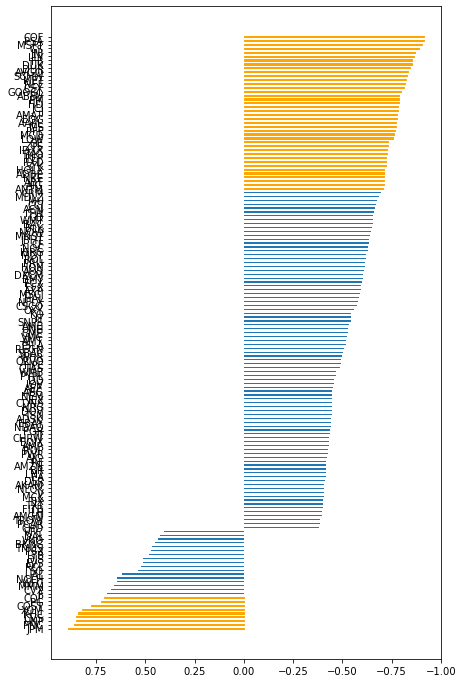

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,12)).gca().invert_xaxis()
bars = plt.barh(total_bar_df['Symbol'], total_bar_df['Corr'], height=0.3, left=0)

for i in total_bar_df[abs(total_bar_df['Corr']) >= 0.7]['Symbol'].index:
    bars[i].set_color('orange')

In [79]:
total_bar_df[abs(total_bar_df['Corr']) >= 0.5].count()

Symbol     102
Corr       102
P-value    102
dtype: int64

In [78]:
total_bar_df[abs(total_bar_df['Corr']) < 0.5].count()

Symbol     51
Corr       51
P-value    51
dtype: int64

### <1차 결론> : S&P 500 기업에서 유의미한 상관계수 측정 가능한 153개 중<br><br>102개 기업은 상관관계가 있다고 말할 수 있으며, 그 중 51개는 매우 강한 상관관계를 가진다는 것을 발견함<br><br>"S&P 500 기업 중 10%는 주가의 방향을 판단할 때 ESG 지표도 함께 고려해도 좋다."

## 강한 상관관계를 가지는 기업들은 서로 공통점이 있는가?
>**'산업 분류'**가 같을지 의문제기

### 위 'total_details_df' 데이터프레임에 column으로 개별 기업이 속한 **'산업 분야'**를 표에 이어 붙인 후 **scatterplot에 일단 뿌려보기**<br><br>

1. Energy(에너지) ; 석유, 가스, 석탄 연료 등 천연자원  Exxon, Shell, Chevron<br><br>

2. Materials(원자재) ; 화학, 건축자재, 금속, 광물, 목재 등 DowDuPont, Ecolab <br><br>

3. Industrials (산업재) ; 항공, 우주, 건설, 제조업, 국방 Boeing, 3M, Honeywell, UPS <br><br>

4. Consumer Discretionary (자유 소비재); 의류, 레스토랑, 자동차, 미디어, 가정용품 Amazon, Home Depot, Ford<br><br>

5. Consumer Staples (필수 소비재) ; 식품, 음료, 담배, 화장품 Walmart, Coca-Cola, Procter and Gamble<br><br>

6. Healthcare (의료, 건강); 의약품, 의료 서비스 Johnson and Johnson, Pfizer, Merck<br><br>

7. Financial (금융); 은행, 대부업 JPMorgan, Bank of America, Wells Fargo<br><br>

8. Information Technology (기술주) ; IOT, 데이터처리 Microsoft, Intel, Visa, Salesforce<br><br>

9. Communications (통신) ; 5g, 통신사업 Verizon, AT&T, Comcast <br><br>

10. Utilities (유틸리티) ; 전기, 수도 NextEra, DUK <br><br>

11. Real Estate (부동산) ; 부동산 임대사업 realty Income, pubic storage<br><br>

In [23]:
# 기업이 속한 산업분야 목록 불러오기
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df_wiki = first_table
symbols_list2 = df_wiki['Symbol'].values.tolist()
sectors_list2 = df_wiki['GICS Sector'].values.tolist()

sector_dataframe = pd.DataFrame(symbols_list, columns=['Symbol'])
sector_dataframe['Sector'] = sectors_list2

sector_dataframe

,Symbol,Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ABMD,Health Care
5,ACN,Information Technology
6,ATVI,Communication Services
7,ADM,Consumer Staples
8,ADBE,Information Technology
9,ADP,Information Technology


In [24]:
total_details_addSector = pd.merge(total_details_df, sector_dataframe, how='inner', on=None)

total_details_addSector['num'] = [i for i in range(1, 154)]
total_details_addSector.set_index('num', inplace=True)

total_details_addSector

,Symbol,Corr,P-value,Sector
num,,,,
1,MMM,0.656121,2.023425e-04,Industrials
2,AOS,-0.610639,7.174331e-04,Industrials
3,ABT,-0.711133,3.212657e-05,Health Care
4,ABBV,-0.788800,1.018702e-06,Health Care
5,ACN,-0.663367,1.622088e-04,Information Technology
6,ADBE,-0.711686,3.147156e-05,Information Technology
7,AIG,-0.711023,3.225842e-05,Financials
8,AKAM,-0.408682,3.430131e-02,Information Technology
9,LNT,-0.415848,3.097829e-02,Utilities


<AxesSubplot:xlabel='Corr', ylabel='P-value'>

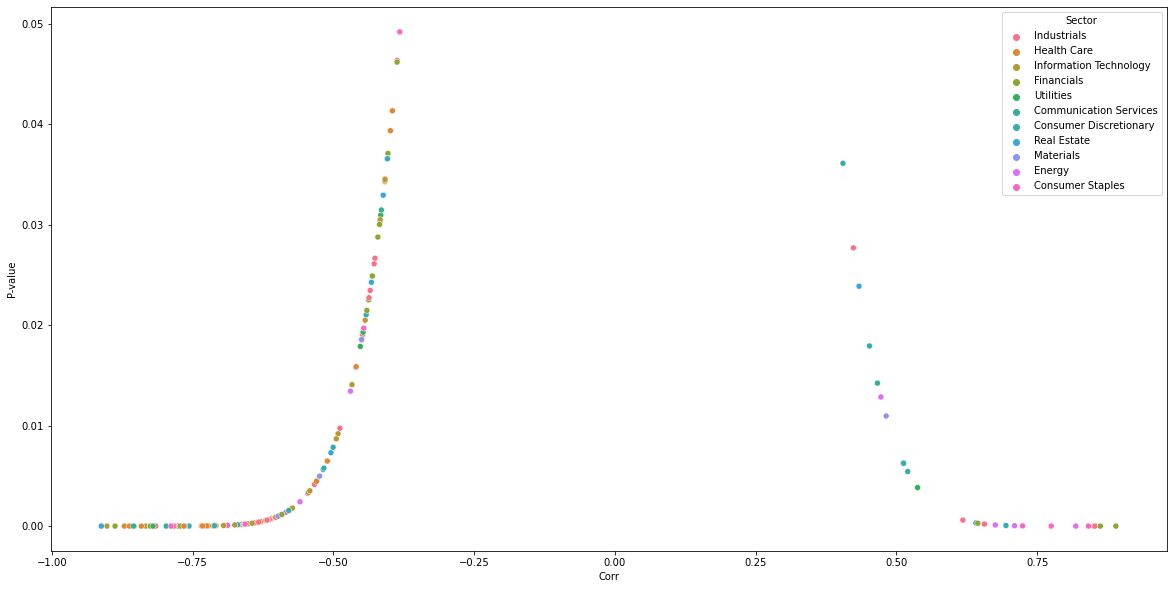

In [48]:
plt.figure(figsize=(20,10))

plt = sns.scatterplot(data=total_details_addSector, x="Corr", y="P-value", hue='Sector')

plt

In [69]:
total_sector = total_details_addSector

In [71]:
total_sector['Sector'].value_counts()

Industrials               26
Health Care               24
Financials                22
Information Technology    21
Consumer Discretionary    15
Consumer Staples          11
Energy                     9
Real Estate                7
Utilities                  6
Communication Services     6
Materials                  6
Name: Sector, dtype: int64

In [130]:
total_sector[total_sector['Corr'] <= -0.7].sort_values('Sector')

,Symbol,Corr,P-value,Sector
num,,,,
10,GOOGL,-0.796783,6.594042e-07,Communication Services
92,FB,-0.854952,1.361475e-08,Communication Services
71,HD,-0.786089,1.175944e-06,Consumer Discretionary
87,LOW,-0.756287,5.035313e-06,Consumer Discretionary
104,NKE,-0.711334,3.188756e-05,Consumer Discretionary
89,MCD,-0.763929,3.538054e-06,Consumer Discretionary
114,PM,-0.788359,1.042901e-06,Consumer Staples
112,PEP,-0.723866,1.975315e-05,Consumer Staples
116,PXD,-0.723722,1.986545e-05,Energy


In [65]:
len(total_sector[(total_sector['Corr'] > -0.7) & (total_sector['Corr'] <= -0.5)].sort_values('Sector'))
# 어느 정도 음의 상관관계를 가지는 기업

43

In [29]:
len(total_sector[(total_sector['Corr'] >= 0.5) & (total_sector['Corr'] < 0.7)].sort_values('Sector'))
# 어느 정도 양의 상관관계를 가지는 기업

10

In [30]:
len(total_sector[total_sector['Corr'] >= 0.7].sort_values('Sector'))
# 강한 양의 상관관계를 가지는 기업

9

In [72]:
len(total_sector[(total_sector['Corr'] > -0.5) & (total_sector['Corr'] < 0.5)].sort_values('Sector'))
# 유의미한 상관관계가 없는 기업

51

### '산업 분류'라는 지표 하나만으로는 유의미한 분석이 안 되겠다. 그럼 '시가총액'이 큰 기업들이 상관관계가 높을까?

- 시가총액 불러오기<br><br>
- 기업별 시가총액 차이 bar plot으로 확인해보기<br><br>
- 범위가 [-1, 1]인 Corr과 같이 차트에 놓고 보기에, 시가총액 차이가 너무 커서 구분이 힘들다면 **scaling** 해주기(MinMaxScaler())<br><br>
- 앞선 'total_sector' 데이터프레임에 시가총액(marketCap)을 이어붙이기


In [31]:
# 선발되었던 기업들의 시가총액을 total_sector에 합치기
import pandas_datareader as web
from pandas_datareader import data

tickers = total_sector['Symbol']
marketData_list = []

for ticker in tickers:
    print(ticker)
    try: 
        marketData_list.append(web.get_quote_yahoo(ticker)['marketCap'])
    except:
        print('Error with: ', ticker)
                
# 시가총액에 대해 루트를 씌워서 비교 후 log를 씌워서 비교해보려 함
df3 = pd.concat(marketData_list, axis=0)
df4 = pd.DataFrame(df3).reset_index()
df4['rooted'] = np.sqrt(df4['marketCap'])
df4['logged'] = np.log(df4['marketCap'])

marketData_df = df4

MMM
AOS
ABT
ABBV
ACN
ADBE
AIG
AKAM
LNT
GOOGL
AMZN
AEE
AXP
AMT
AMP
ABC
AME
AMGN
ANTM
AAPL
AMAT
ADSK
BAC
BLK
BKNG
BMY
AVGO
BR
CHRW
CDNS
COF
CF
SCHW
CVX
CHD
CTAS
CSCO
CME
KO
COP
COST
CCI
CSX
CVS
DHR
DAL
DXCM
DLR
DIS
DOV
DUK
DD
EBAY
EA
EOG
EFX
EQIX
RE
XOM
FITB
F
FCX
AJG
IT
GE
GD
GS
HAL
HPE
HOLX
HD
HON
IEX
IDXX
ITW
ISRG
IQV
JBHT
J
JNJ
JCI
JPM
KHC
LH
LVS
LLY
LOW
LYB
MCD
MCK
MDT
FB
MET
MU
MSFT
MDLZ
MNST
MS
MSCI
NDAQ
NFLX
NEM
NEE
NKE
NOC
NLOK
NCLH
NRG
OXY
PCAR
PYPL
PEP
PFE
PM
PSX
PXD
PNC
PG
PGR
PRU
PSA
QRVO
PWR
REGN
ROL
ROP
RCL
CRM
SBAC
NOW
SO
SYK
SNPS
TMUS
TROW
TSLA
TXT
TMO
TJX
TT
TSN
UNP
UAL
UNH
VFC
V
VNO
VMC
WMT
WFC
WHR
WMB
ZTS


In [32]:
marketData_df

,index,marketCap,rooted,logged
0,MMM,84738326528,2.910985e+05,25.162834
1,AOS,10032199680,1.001609e+05,23.029066
2,ABT,208725508096,4.568649e+05,26.064286
3,ABBV,286331633664,5.350996e+05,26.380417
4,ACN,213773139968,4.623561e+05,26.088181
5,ADBE,215212556288,4.639101e+05,26.094892
6,AIG,50608185344,2.249626e+05,24.647379
7,AKAM,19143829504,1.383612e+05,23.675246
8,LNT,15649928192,1.250997e+05,23.473732
9,GOOGL,1842758418432,1.357482e+06,28.242285


- 기업 간 시가총액 비교

<BarContainer object of 153 artists>

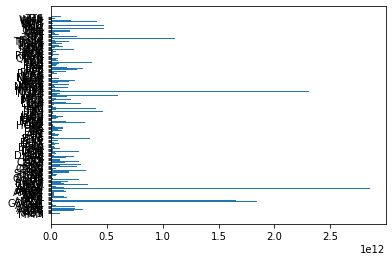

In [37]:
import matplotlib.pyplot as plt

plt.barh(marketData_df['index'],marketData_df['marketCap'])


- 각 기업 간 시가총액의 차이를 효율적으로 보기 위해 시가총액(MarketCap)을 MinMaxScaler로 Scailing하여 자료 정리

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer 

ct = ColumnTransformer([
        ('somename', MinMaxScaler(), ['marketCap', 'rooted','logged'])
    ], remainder='passthrough')
ct_dataframe = pd.DataFrame(ct.fit_transform(marketData_df), columns=['Marketcap','Rooted','Logged','Symbol'])

<BarContainer object of 153 artists>

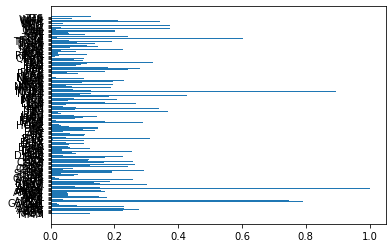

In [39]:
plt.barh(ct_dataframe['Symbol'],ct_dataframe['Rooted'])

<BarContainer object of 153 artists>

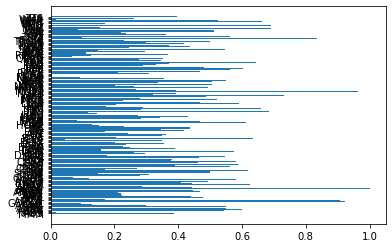

In [40]:
plt.barh(ct_dataframe['Symbol'],ct_dataframe['Logged'])

In [41]:
total_marketCap = pd.merge(total_sector, ct_dataframe, how='inner', on=None)

In [88]:
total_marketCap = total_marketCap.sort_values('Corr', ascending=True)
total_marketCap

,Symbol,Corr,P-value,Sector,Marketcap,Rooted,Logged
30,COF,-0.912101,3.581582e-11,Financials,0.015538,0.08493,0.307128
120,PSA,-0.912057,3.603223e-11,Real Estate,0.020882,0.104286,0.350782
94,MSFT,-0.902116,1.300535e-10,Information Technology,0.81053,0.894671,0.963558
66,GS,-0.887677,6.700324e-10,Financials,0.036059,0.149737,0.435836
79,JNJ,-0.870915,3.469516e-09,Health Care,0.160865,0.368689,0.684769
85,LLY,-0.862097,7.539973e-09,Health Care,0.092803,0.267939,0.591481
91,FB,-0.854952,1.361475e-08,Communication Services,0.209873,0.428533,0.730271
50,DUK,-0.853757,1.498221e-08,Utilities,0.027053,0.124125,0.390482
44,DHR,-0.840892,3.994309e-08,Health Care,0.070662,0.227656,0.545842
26,AVGO,-0.833272,6.862092e-08,Information Technology,0.087298,0.258399,0.581201


### Corr이 1 또는 -1에 가까워질 때 시가총액이 커지는 모습이 나오는가?

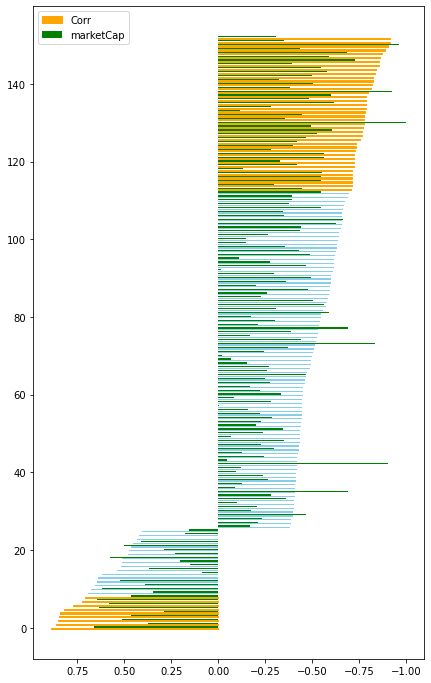

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,12)).gca().invert_xaxis()

for i in total_bar_df[abs(total_bar_df['Corr']) >= 0.7]['Symbol'].index:
    bars[i].set_color('orange')
    
bars = plt.barh(y-0.2, total_bar_df2['Corr'], height=0.3, left=0, color='skyblue', label='Corr')
for i in total_bar_df[abs(total_bar_df['Corr']) >= 0.7]['Symbol'].index:
    bars[i].set_color('orange')
    
tempbar = total_bar_df2.copy()
for item,row in total_bar_df2.iterrows() :
    if row['Corr'] < 0 : 
        tempbar.loc[tempbar['Symbol'] == row['Symbol'],'Logged'] *= -1
    
bars = plt.barh(y+0.2,tempbar['Logged'], height=0.3, left=0, color='g', label='marketCap')

plt.legend()



In [54]:
total_bar_df2= total_marketCap.sort_values(by='Corr', ascending=False).reset_index(drop=True)
(total_bar_df2[total_bar_df2['Corr'] < 0]['Marketcap']) *= -1
total_bar_df2[total_bar_df2['Corr'] < 0]['Marketcap']

C:\Users\Jungho\AppData\Local\Temp/ipykernel_2176/3460989021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (total_bar_df2[total_bar_df2['Corr'] < 0]['Marketcap']) *= -1


26     0.005279
27     0.007567
28     0.008913
29      0.04421
30     0.005457
31     0.007177
32     0.002452
33     0.022229
34     0.012932
35     0.165866
36      0.00222
37     0.003527
38     0.011285
39     0.009313
40     0.002297
41     0.003189
42     0.580791
43     0.000954
44     0.009672
45     0.003399
46     0.014344
47      0.00848
48     0.020474
49     0.001587
50     0.009342
51     0.020259
52     0.007102
53     0.008631
54     0.013387
55     0.008225
56     0.004747
57     0.000057
58     0.012905
59     0.001924
60     0.018956
61     0.008178
62     0.005307
63     0.012328
64     0.010074
65     0.044221
66     0.011106
67     0.012125
68     0.004436
69     0.001525
70     0.000343
71     0.009861
72     0.023476
73     0.388883
74     0.037108
75     0.005382
76     0.026886
77     0.165717
78     0.007651
79     0.014751
80     0.005405
81     0.091421
82     0.015503
83     0.078338
84     0.055337
85     0.008767
86     0.011175
87     0.046644
88     0

- 각 산업별로 나눈 후, '상관관계의 깊음 정도'가 '시가총액의 크기'에 비례하는지를 보고자 함.

In [56]:
sectors = total_marketCap['Sector'].value_counts().index
sectors

Index(['Industrials', 'Health Care', 'Financials', 'Information Technology',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Real Estate',
       'Communication Services', 'Utilities', 'Materials'],
      dtype='object')

No handles with labels found to put in legend.
C:\Users\Jungho\.conda\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.
C:\Users\Jungho\.conda\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.
C:\Users\Jungho\.conda\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the on

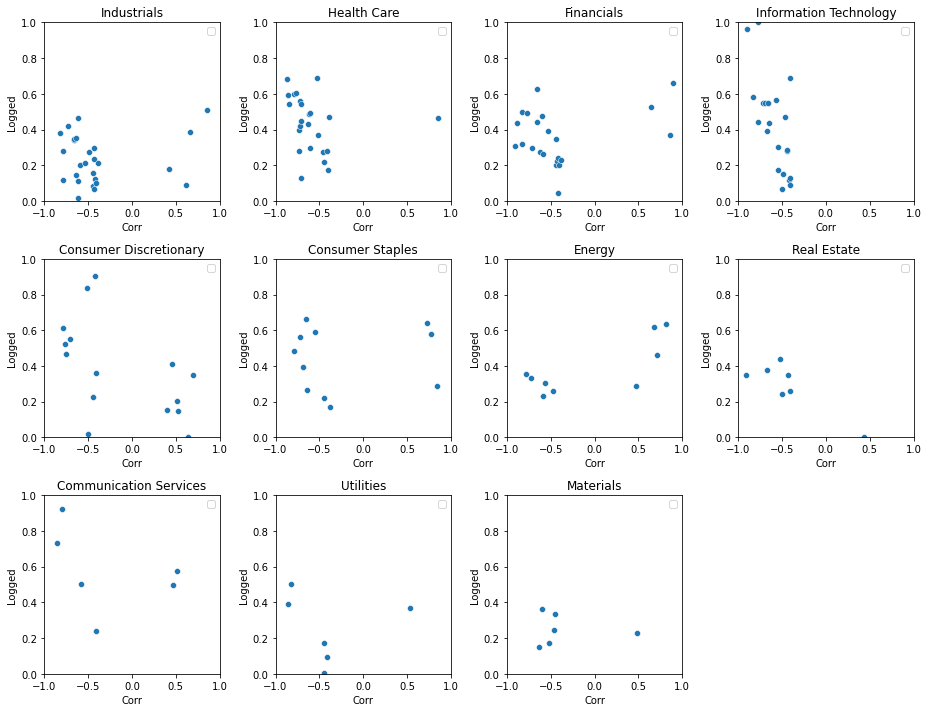

In [109]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(13, 10))

for i, sector in enumerate(sectors):
    plt.subplot(3, 4, i+1)
    plt.title(sector)
    plt.xlim(-1,1)
    plt.ylim(0,1)
    plt.xlabel('Corr')
    plt.ylabel('Logged')
    plt.legend(loc='best')
    sns.scatterplot(total_marketCap[total_marketCap['Sector'] == sector]['Corr'], total_marketCap[total_marketCap['Sector'] == sector]['Logged'])

fig.tight_layout()

### <2차 결론> S&P 500 기업 중 유의미한 상관계수를 가지는 기업은 153개가 있었고,<br><br> 그 중 유의미한 상관관계를 가지는 기업은 102개였으며, 강한 상관관계를 가지는 기업은 49개가 있다.<br><br>그리고 그 49개 기업 중에서 'IT'와 'HealthCare' 에 속하는 기업들은 '상관관계의 깊음 정도'와<br><br>'시가총액의 규모'가 비례관계에 있음을 확인하였음.
>즉, 해당 섹터 내 기업들은 규모가 클수록 'ESG 지표와 주가 간 상관관계'가 매우 깊어지는 형태를 볼 수 있음
>> 음의 상관관계 : COF, PSA, MSFT, GS, JNJ, LLY, FB, DUK, DHR, AVGO, SCHW, MET, NEEM, CSXM, GOOGL<br><br>
>> 양의 상관관계 : JPM, PNC, UNP, CVS, KHC, XOM 등

In [110]:
total_marketCap[abs(total_marketCap['Corr']) > 0.7].sort_values(by='Corr')

,Symbol,Corr,P-value,Sector,Marketcap,Rooted,Logged
30,COF,-0.912101,3.581582e-11,Financials,0.015538,0.08493,0.307128
120,PSA,-0.912057,3.603223e-11,Real Estate,0.020882,0.104286,0.350782
94,MSFT,-0.902116,1.300535e-10,Information Technology,0.81053,0.894671,0.963558
66,GS,-0.887677,6.700324e-10,Financials,0.036059,0.149737,0.435836
79,JNJ,-0.870915,3.469516e-09,Health Care,0.160865,0.368689,0.684769
85,LLY,-0.862097,7.539973e-09,Health Care,0.092803,0.267939,0.591481
91,FB,-0.854952,1.361475e-08,Communication Services,0.209873,0.428533,0.730271
50,DUK,-0.853757,1.498221e-08,Utilities,0.027053,0.124125,0.390482
44,DHR,-0.840892,3.994309e-08,Health Care,0.070662,0.227656,0.545842
26,AVGO,-0.833272,6.862092e-08,Information Technology,0.087298,0.258399,0.581201


## 기타) 위 IT 및 HealthCare 그룹에 속한 기업들은 각 산업별로 주가가 같은 방향으로 움직일까?

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<AxesSubplot:>

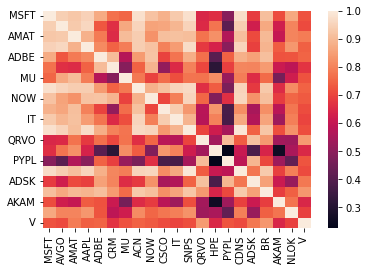

In [113]:
new_symbols_list = total_marketCap[total_marketCap['Sector'] == 'Information Technology']['Symbol'].tolist()

prices_each = []
symbol_list_last=[]
count=0

for symbol in new_symbols_list:
    price_data = yfinance.download([symbol], start = '2019-12-01' )
    price_list = price_data['Adj Close'].values.tolist()
    
    prices_each.append(price_list)
    symbol_list_last.append(symbol)
    
price_table = pd.DataFrame(prices_each)
price_table = price_table.T
price_table.columns = symbol_list_last

sns.heatmap(price_table.corr())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

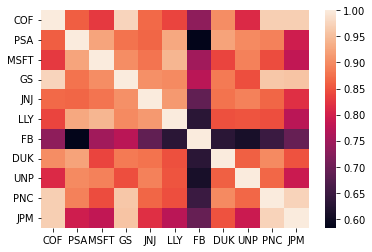

In [112]:
new_symbols_list = total_marketCap[abs(total_marketCap['Corr']) > 0.85]['Symbol'].tolist()

prices_each = []
symbol_list_last=[]
count=0

for symbol in new_symbols_list:
    price_data = yfinance.download([symbol], start = '2019-12-01' )
    price_list = price_data['Adj Close'].values.tolist()
    
    prices_each.append(price_list)
    symbol_list_last.append(symbol)
    
price_table = pd.DataFrame(prices_each)
price_table = price_table.T
price_table.columns = symbol_list_last

sns.heatmap(price_table.corr())


In [115]:
total_marketCap[abs(total_marketCap['Corr']) > 0.85]['Sector'].tolist()


['Financials',
 'Real Estate',
 'Information Technology',
 'Financials',
 'Health Care',
 'Health Care',
 'Communication Services',
 'Utilities',
 'Industrials',
 'Financials',
 'Financials']

# 프로젝트를 하면서 느낀 점

####  1. 열심히 기획을 한 부분을 Scatter Plot으로 뿌렸을 때 원했던 방향으로 자꾸 해석하려 했다는 점에 대해 '데이터를 원하는 방향으로 보려고 하지 마라'는 멘토님의 조언이 굉장히 인상깊었다.
#### 2. 원하는 방향이 나오지 않아 낙심했던 부분에 있어서도 '그것마저도 유의미한 결과가 될 수 있다'는 점을 새로 배웠고 앞으로 데이터를 바라보는 자세에 있어 큰 깨달음을 얻었다